# 1. Primera base de datos. MHEALTH

## 1.1. Cargar datos

In [1]:
import pandas as pd
import os

In [3]:
pd.set_option("display.float_format", "{:.3f}".format)

In [5]:
from abc import ABC, abstractmethod

class AbstractDataLoader(ABC):
    def __init__(self, src_path:str, keys:list, file_extension:str, delimiter:str):
        self.src_path = src_path
        self.keys = keys
        self.file_extension = file_extension
        self.delimiter = delimiter     
        
    @abstractmethod
    def load_data(self):
        pass

    
    def _is_valid_extension(self, file):
        pass

In [7]:
class DataLoader(AbstractDataLoader):
    def __init__(self, src_path:str, keys:list, file_extension:str, delimiter:str):
        super().__init__(src_path, keys, file_extension, delimiter)
        
    
    def load_data(self):
        dataframes = []
        for file in os.listdir(self.src_path):
            print(file)
            if self._is_valid_extension(file):  
                df = pd.read_csv(os.path.join(self.src_path, file), delimiter=self.delimiter, names=self.keys)
                print(df.shape)
                df['subject_id'] = self._get_subject_id(file)

                dataframes.append(df)
        final_df = pd.concat(dataframes, ignore_index=True)
        return final_df

                
    def _is_valid_extension(self, file):
        return file.endswith(self.file_extension)

    def _get_subject_id(self, file):
        return file.split('.')[0]

In [9]:
src = 'datasets/1_mhealth/MHEALTHDATASET/'
keys = ['x_acc_chest','y_acc_chest','z_acc_chest',
        'ecg1','ecg2',
        'x_acc_lef_ank','y_acc_lef_ank','z_acc_lef_ank',
        'x_gyro_lef_ank','y_gyro_lef_ank','z_gyro_lef_ank',
        'x_mgnt_lef_ank','y_mgnt_lef_ank','z_mgnt_lef_ank',
        'x_acc_rgt_low_arm','y_acc_rgt_low_arm','z_acc_rgt_low_arm',
       'x_gyro_rgt_low_arm','y_gyro_rgt_low_arm','z_gyro_rgt_low_arm',
       'x_mgnt_rgt_low_arm','y_mgnt_rgt_low_arm','z_mgnt_rgt_low_arm','null_class']
file_extension = '.log'
delimiter = r'\s+'
data_loader = DataLoader(src, keys, file_extension, delimiter)
fusioned_df = data_loader.load_data()

mHealth_subject1.log
(161280, 24)
mHealth_subject10.log
(98304, 24)
mHealth_subject2.log
(130561, 24)
mHealth_subject3.log
(122112, 24)
mHealth_subject4.log
(116736, 24)
mHealth_subject5.log
(119808, 24)
mHealth_subject6.log
(98304, 24)
mHealth_subject7.log
(104448, 24)
mHealth_subject8.log
(129024, 24)
mHealth_subject9.log
(135168, 24)


## 1.2. Dimensiones y Primeras 5 filas

Una vez tenemos cargados los datos podemos empezar con su análisis. El primer paso es observar cuántos ejemplos y características tenemos. 

In [11]:
fusioned_df.shape

(1215745, 25)

Observamos que tensmo 1215745 ejemplos y 25 características

## 1.3. Identifica y elimina los datos ausentes

Una vez observamos que tenemos 25 columnas, queremos asegurarnos de que todas tienen datos. Esto porque los modelos de aprendizaje máquina esperan recibir como entrada vectores de enteros, y un valor faltante haría imposible su procesamiento. En términos de separar las clases, lo que queremos es obtener una línea (o, en este caso, hiperplano) que separe los ejemplos, y si algún ejemplo no tiene un valor, no sería posible localizarlo en el plano cartesiano, y por lo tanto no sería posible dibujar una curva que los separe y no podríamos clasificarlos. Es por esto que nos interesa eliminar los valores falantes.

In [13]:
fusioned_df.isnull().sum()

x_acc_chest           0
y_acc_chest           0
z_acc_chest           0
ecg1                  0
ecg2                  0
x_acc_lef_ank         0
y_acc_lef_ank         0
z_acc_lef_ank         0
x_gyro_lef_ank        0
y_gyro_lef_ank        0
z_gyro_lef_ank        0
x_mgnt_lef_ank        0
y_mgnt_lef_ank        0
z_mgnt_lef_ank        0
x_acc_rgt_low_arm     0
y_acc_rgt_low_arm     0
z_acc_rgt_low_arm     0
x_gyro_rgt_low_arm    0
y_gyro_rgt_low_arm    0
z_gyro_rgt_low_arm    0
x_mgnt_rgt_low_arm    0
y_mgnt_rgt_low_arm    0
z_mgnt_rgt_low_arm    0
null_class            0
subject_id            0
dtype: int64

En este caso, tal parece que no hay valores faltantes. Por lo que no tenemos que realizar el proceso de eliminarlos.

## 1.4. Tipos de datos de cada atributo

Queremos saber los tipos de datos que tenemos para saber como procesarlos. Los modelos de aprendizaje máquina solo trabajan sobre vectores numéricos, por lo que sería imposible trabajar con strings u otro tipo de objetos. Es por esto que queremos determinar los tipos de datos y así transformarlos en el formato adecuado. 

In [15]:
fusioned_df.dtypes

x_acc_chest           float64
y_acc_chest           float64
z_acc_chest           float64
ecg1                  float64
ecg2                  float64
x_acc_lef_ank         float64
y_acc_lef_ank         float64
z_acc_lef_ank         float64
x_gyro_lef_ank        float64
y_gyro_lef_ank        float64
z_gyro_lef_ank        float64
x_mgnt_lef_ank        float64
y_mgnt_lef_ank        float64
z_mgnt_lef_ank        float64
x_acc_rgt_low_arm     float64
y_acc_rgt_low_arm     float64
z_acc_rgt_low_arm     float64
x_gyro_rgt_low_arm    float64
y_gyro_rgt_low_arm    float64
z_gyro_rgt_low_arm    float64
x_mgnt_rgt_low_arm    float64
y_mgnt_rgt_low_arm    float64
z_mgnt_rgt_low_arm    float64
null_class              int64
subject_id             object
dtype: object

In [17]:
fusioned_df.head(3)

,x_acc_chest,y_acc_chest,z_acc_chest,ecg1,ecg2,x_acc_lef_ank,y_acc_lef_ank,z_acc_lef_ank,x_gyro_lef_ank,y_gyro_lef_ank,...,y_acc_rgt_low_arm,z_acc_rgt_low_arm,x_gyro_rgt_low_arm,y_gyro_rgt_low_arm,z_gyro_rgt_low_arm,x_mgnt_rgt_low_arm,y_mgnt_rgt_low_arm,z_mgnt_rgt_low_arm,null_class,subject_id
0,-9.818,0.010,0.296,0.004,0.004,2.185,-9.697,0.631,0.104,-0.841,...,-4.578,0.188,-0.449,-1.010,0.034,-2.350,-1.610,-0.031,0,mHealth_subject1
1,-9.849,0.524,0.373,0.004,0.017,2.388,-9.508,0.684,0.085,-0.839,...,-4.320,0.024,-0.449,-1.010,0.034,-2.163,-0.883,0.327,0,mHealth_subject1
2,-9.660,0.182,0.437,0.017,0.038,2.409,-9.567,0.681,0.085,-0.839,...,-4.277,0.276,-0.449,-1.010,0.034,-1.617,-0.166,-0.031,0,mHealth_subject1


El DataFrame, como contiene NumPy arrays, estos asignan valores numéricos a aquellas características cuyos valores sean solo numeros. Por otra parte, si tenemos una columna con strings u otro tipo de dato, lo asigna automáticamente como object. En este caso, observamos que tenemos una columna "subject_id" la cual es de tipo object. Esto es porque el subject_id es un identificador único para las diferentes personas de las cuales se obtuvieron las mediciones. Este es un ejemplo de valor en la característica subject_id: "mHealth_subject1". Como podemos observar esto es una cadena de caractéres. En este caso no es necesario tratar esta columna puesto que en realidad este valor no está directamente relacionado con los resultados de las mediciones (es decir, no influye en ellos). Pero no lo eliminaremos de momento porque nos ayuda a identificar a las diferentes personas que formaron parte del experimento y así dividir el dataset en entrenamiento y prueba evitando el data leakage. 

## 1.5. Resumen estadístico

En el resumen estadístico queremos saber si existe alguna diferencia grande entre los valores típicos de nuestros datos. Esto porque, si existe una garn diferencia, podría afectar el desempeño de clasificadores como los lineales o polínomiales, redes neuronales, K-NN, SVM, etc. Es por esto que queremos encontrar si existen diferencias para poder tratarlas. 

De la misma manera, estamos buscando si existen valores atípicos que puedan ser considerados ruido y que puedan afectar la capacidad de generalización de nuestro modelo. Estos nos interesa eliminarlos.

También buscamos saber si nuestra distribución de datos está sesgada, esto porque los modelos de aprendizaje máquina están armados para recibir valores insesgados. Entonces si estos existen tendríamos que eliminarlos para obtener el mejor desempeño para nuestro modelo.

In [19]:
fusioned_df.describe()

,x_acc_chest,y_acc_chest,z_acc_chest,ecg1,ecg2,x_acc_lef_ank,y_acc_lef_ank,z_acc_lef_ank,x_gyro_lef_ank,y_gyro_lef_ank,...,x_acc_rgt_low_arm,y_acc_rgt_low_arm,z_acc_rgt_low_arm,x_gyro_rgt_low_arm,y_gyro_rgt_low_arm,z_gyro_rgt_low_arm,x_mgnt_rgt_low_arm,y_mgnt_rgt_low_arm,z_mgnt_rgt_low_arm,null_class
count,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,...,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000
mean,-8.522,-0.214,-1.056,-0.005,-0.005,1.494,-9.693,-0.955,-0.002,-0.617,...,-3.713,-5.806,2.394,-0.276,-0.466,0.267,0.170,0.714,-0.367,1.741
std,4.075,2.139,3.574,0.747,0.727,3.826,4.171,5.462,0.491,0.355,...,4.764,5.758,3.877,0.528,0.556,0.564,26.676,33.445,69.551,3.284
min,-22.438,-20.188,-18.401,-8.620,-8.620,-22.146,-19.619,-19.373,-2.147,-7.790,...,-22.361,-18.972,-18.239,-8.339,-3.571,-2.690,-319.030,-363.900,-717.550,0.000
25%,-9.804,-1.273,-2.867,-0.234,-0.188,0.141,-10.201,-2.649,-0.436,-0.818,...,-6.076,-9.404,0.130,-0.706,-0.897,-0.237,-6.192,-9.520,-14.238,0.000
50%,-9.311,-0.354,-0.870,-0.071,-0.042,1.309,-9.670,-0.016,-0.015,-0.707,...,-2.978,-7.462,1.928,-0.355,-0.634,0.302,0.363,0.352,-0.673,0.000
75%,-7.637,0.710,0.726,0.159,0.151,2.576,-9.042,1.301,0.449,-0.540,...,-1.194,-2.534,4.915,0.096,-0.107,0.778,6.792,10.076,13.186,2.000
max,19.094,20.927,26.196,8.515,8.519,20.054,21.161,25.015,60.484,2.011,...,19.864,22.191,25.741,3.320,1.556,2.750,251.150,337.760,657.180,12.000


En el diagrama de caja y bigotes podemos observar la distribución de las columnas de manera más clara:

## 1.6. Distribución de clases

En la distribución de clases, buscamos si existe un imbalance de clases. Un imbalance de clases hace que las métricas de desempeño no sean confiables puesto que, si el imbalance de clases es muy grande y nuestros datos en realidad se distribuyen naturalmente de forma imbalanceada, no podríamos saber si métricas como accuracy son confiables puesto que por pura probabilidad, si todas las clases las clasificara como la clase mayor, parecería que tenemos una buena performance. Si notamos un imbalance pronunciado, esto indica que para saber si el modelo tiene buen desempeño no es suficiente con mirar una sola métrica como accuracy, sino que tenemos que analizar las métricas por cada clase y en especial métricas como el F1-score. De la misma manera, si queremos saber si el modelo clasifica bien en general, no sería suficiente con sumar todos TP, TF, FP y FN, puesto que la clase mayor, al tener una mayor cantidad de instancias, terminaría ocupando una mayor cantidad, y las métricas convergerían hacia ella. Por lo que tendríamos que usar un macro average en lugar de un micro average, siendo el macro average el promedio de las métricas por clase. 

In [21]:
class_distribution = fusioned_df['null_class'].value_counts()
class_distribution

null_class
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

En este caso, observamos que existe un imbalance de clases muy pronunciado, siendo la clase mayor la clase "0". Esta clase corresponde con periodos en los que ninguna actividad está ocurriendo, lo cual es normal ya que por lo general las personas no están realizando actividades, y es de esperar que la mayoría de mediciones correspondan a no realizar alguna actividad. 

Para hacernos una idea más clara de la distribución de las clases, podemos utilizar un gráfico de barras:

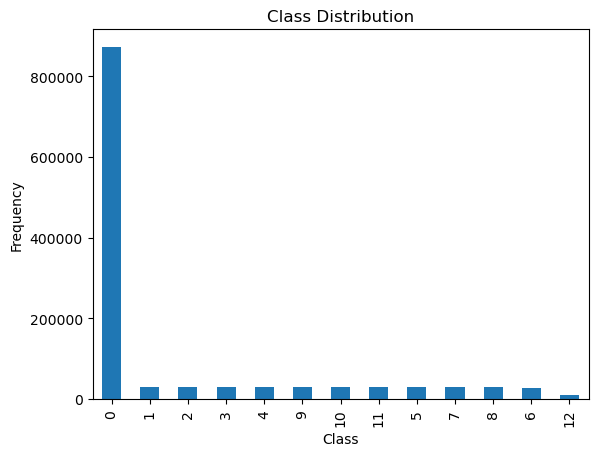

In [23]:
import matplotlib.pyplot as plt

class_distribution = fusioned_df['null_class'].value_counts()
class_distribution.plot(kind='bar') 
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

La gráfica de barras hace más claro que la clase 0 es la que más instancias tiene, siendo esto un gran imbalance de clases. 

Como la clase 0 representa los valores en donde no hay actividad, podemos procesar estos con un downsampling ya que la variación de los datos en estas instancias debería ser muy pequeña (precisamente por que la persona no se mueve) y la variación en la desviación estándar de estos valores no debería cambiar mucho incluso si reducimos la cantidad de ejmplos.

Siendo tan desproporcionado la catidad de ejmplos que hay para la clase 0, no se puede apreciar bien en la gráfica si hay otras clases desbalanceadas. Para observarlo con mayor clariad, volvemos a realizar un gráfico de barras pero ahora excluyendo la clase 0.

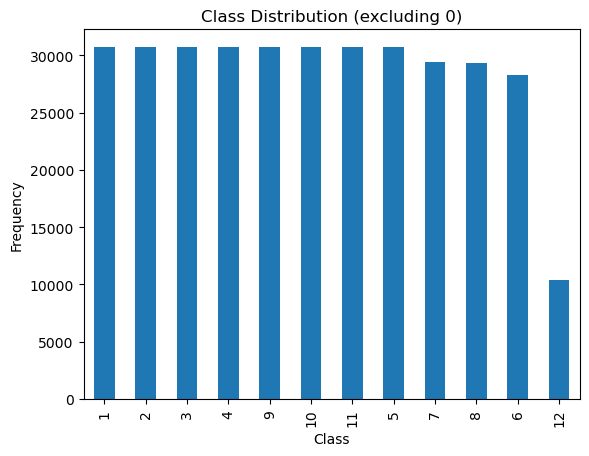

In [25]:
import matplotlib.pyplot as plt

# Filter out rows where 'null_class' is 0, then count the remaining classes
filtered_counts = fusioned_df[fusioned_df['null_class'] != 0]['null_class'].value_counts()

# Plot the resulting distribution
filtered_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution (excluding 0)')
plt.show()

Observamos que sí existe un imbalance de clase incluso dentro de las clases que sí corresponden a una actividad. Esto significa que no podemos simplemente usar métricas como accuracy para evaluar nuestros resultados (puesto que la clase 12 es la menos comun, y bastaría con clasificar normalmente las demás clases para que parezca que el modelo tiene buenos resultados sin contemplar si clasifica bien la clase 12). Por lo que será necesario utilizar métricas como Macro Average (para saber el desempeño general del modelo) y F1-score, para saber si clasifica bien cada clase. 

Asímismo, en lo que respecta al entrenamiento, tendremos que encontrar una manera de balancear esta clase minoritaria. 

## 1.7. Correlación entre atributos

Queremos encontrar sie existen valores corerlacionados, esto por dos razones:

1. **Merjoar clasificación**: Las características redundantes hacen que una misma característica tenga mayor importancia al clasificar.
2. **Menor costo computacional**: Las características requieren un gran costo computacional para procesarlas, a más tenemos mayor es el costo. Queremos reducir el costo lo máximo posible para no perder recursos procesando características innecesarias. Si están correlacionadas, significa que basta una para tener la cantidad necesaria de información.

In [27]:
import pandas as pd

df_filtered = fusioned_df.drop(columns=['mHealth_subject1'], errors='ignore')
df_numeric = df_filtered.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr(method='pearson')
corr_matrix

,x_acc_chest,y_acc_chest,z_acc_chest,ecg1,ecg2,x_acc_lef_ank,y_acc_lef_ank,z_acc_lef_ank,x_gyro_lef_ank,y_gyro_lef_ank,...,x_acc_rgt_low_arm,y_acc_rgt_low_arm,z_acc_rgt_low_arm,x_gyro_rgt_low_arm,y_gyro_rgt_low_arm,z_gyro_rgt_low_arm,x_mgnt_rgt_low_arm,y_mgnt_rgt_low_arm,z_mgnt_rgt_low_arm,null_class
x_acc_chest,1.000,0.075,0.178,0.024,-0.003,0.050,0.306,0.102,0.043,0.248,...,0.266,0.193,0.007,0.065,0.130,0.073,0.010,0.012,0.003,0.127
y_acc_chest,0.075,1.000,-0.347,0.027,0.007,-0.028,-0.092,-0.100,-0.038,-0.120,...,0.060,-0.045,-0.027,0.040,-0.149,-0.011,-0.044,-0.059,0.123,0.094
z_acc_chest,0.178,-0.347,1.000,-0.010,-0.010,0.090,0.230,0.235,0.048,0.250,...,-0.071,0.309,0.004,-0.063,0.334,0.003,-0.006,-0.016,0.029,-0.131
ecg1,0.024,0.027,-0.010,1.000,0.597,0.004,0.003,0.000,-0.002,0.010,...,-0.006,-0.016,0.013,0.013,-0.025,-0.002,0.010,-0.019,0.021,0.002
ecg2,-0.003,0.007,-0.010,0.597,1.000,-0.002,-0.005,0.000,0.013,0.006,...,-0.011,-0.029,0.022,0.022,-0.033,-0.003,0.010,-0.006,0.003,-0.008
x_acc_lef_ank,0.050,-0.028,0.090,0.004,-0.002,1.000,0.018,-0.071,0.062,0.087,...,-0.051,0.060,-0.004,-0.026,0.064,0.016,-0.010,0.001,0.005,0.053
y_acc_lef_ank,0.306,-0.092,0.230,0.003,-0.005,0.018,1.000,0.078,0.049,0.350,...,0.067,0.106,0.092,0.050,0.152,0.105,-0.049,-0.061,0.005,0.000
z_acc_lef_ank,0.102,-0.100,0.235,0.000,0.000,-0.071,0.078,1.000,0.029,0.165,...,-0.125,0.193,0.087,0.042,0.077,-0.005,0.029,0.014,0.018,-0.088
x_gyro_lef_ank,0.043,-0.038,0.048,-0.002,0.013,0.062,0.049,0.029,1.000,0.138,...,0.015,-0.004,0.059,0.368,0.027,0.591,0.020,0.027,-0.030,0.114
y_gyro_lef_ank,0.248,-0.120,0.250,0.010,0.006,0.087,0.350,0.165,0.138,1.000,...,-0.079,0.139,0.083,0.106,0.204,0.124,-0.055,-0.039,0.065,0.035


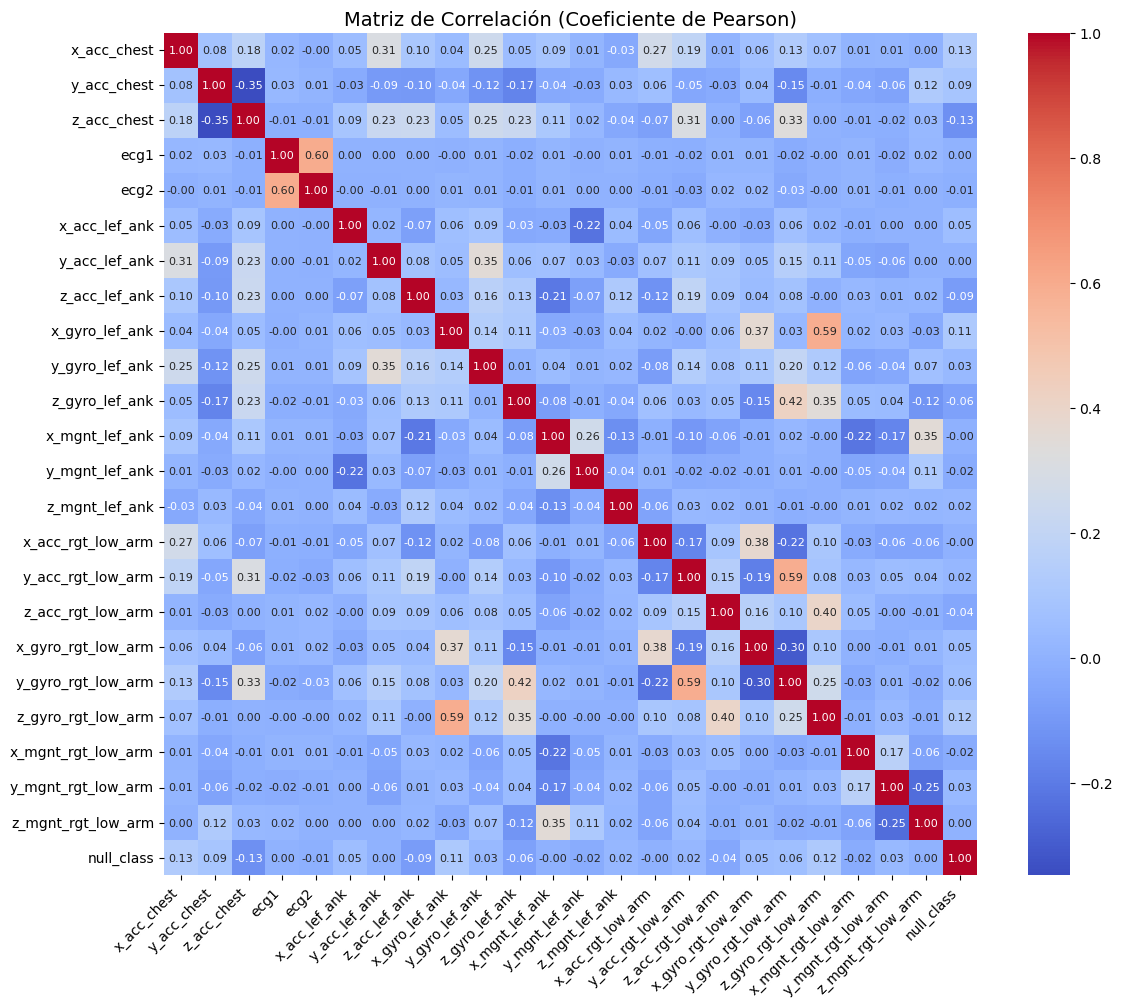

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  
sns.heatmap(
    corr_matrix, 
    annot=True,       # Muestra valores numéricos
    fmt=".2f",        # Formato con 2 decimales
    cmap="coolwarm", 
    annot_kws={"size": 8}  # Tamaño de fuente de los valores
)

# Rotar las etiquetas del eje X para que no se encimen
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ajusta automáticamente los márgenes
plt.tight_layout()

plt.title('Matriz de Correlación (Coeficiente de Pearson)', fontsize=14)
plt.show()


En el gráfico podemos observar que existen pocos valores que vayan más allá de 0.5, esto sugiere que los atributos no están fuertemente correlacionados. 

En concreto. Las correlaciones más altas (mayores a 0.5) se encuentarn en:

- ecg2 y ecg1
- z_gyro_rgt_low_arm y x_gyro_left_ank
- y_gyro_rgt_low_arm y y_acc_rgt_low_arm

Esto sugiere que podríamos eliminar alguna de estas características para reducir las correlaciones.

## 1.8. Histograma de atributos

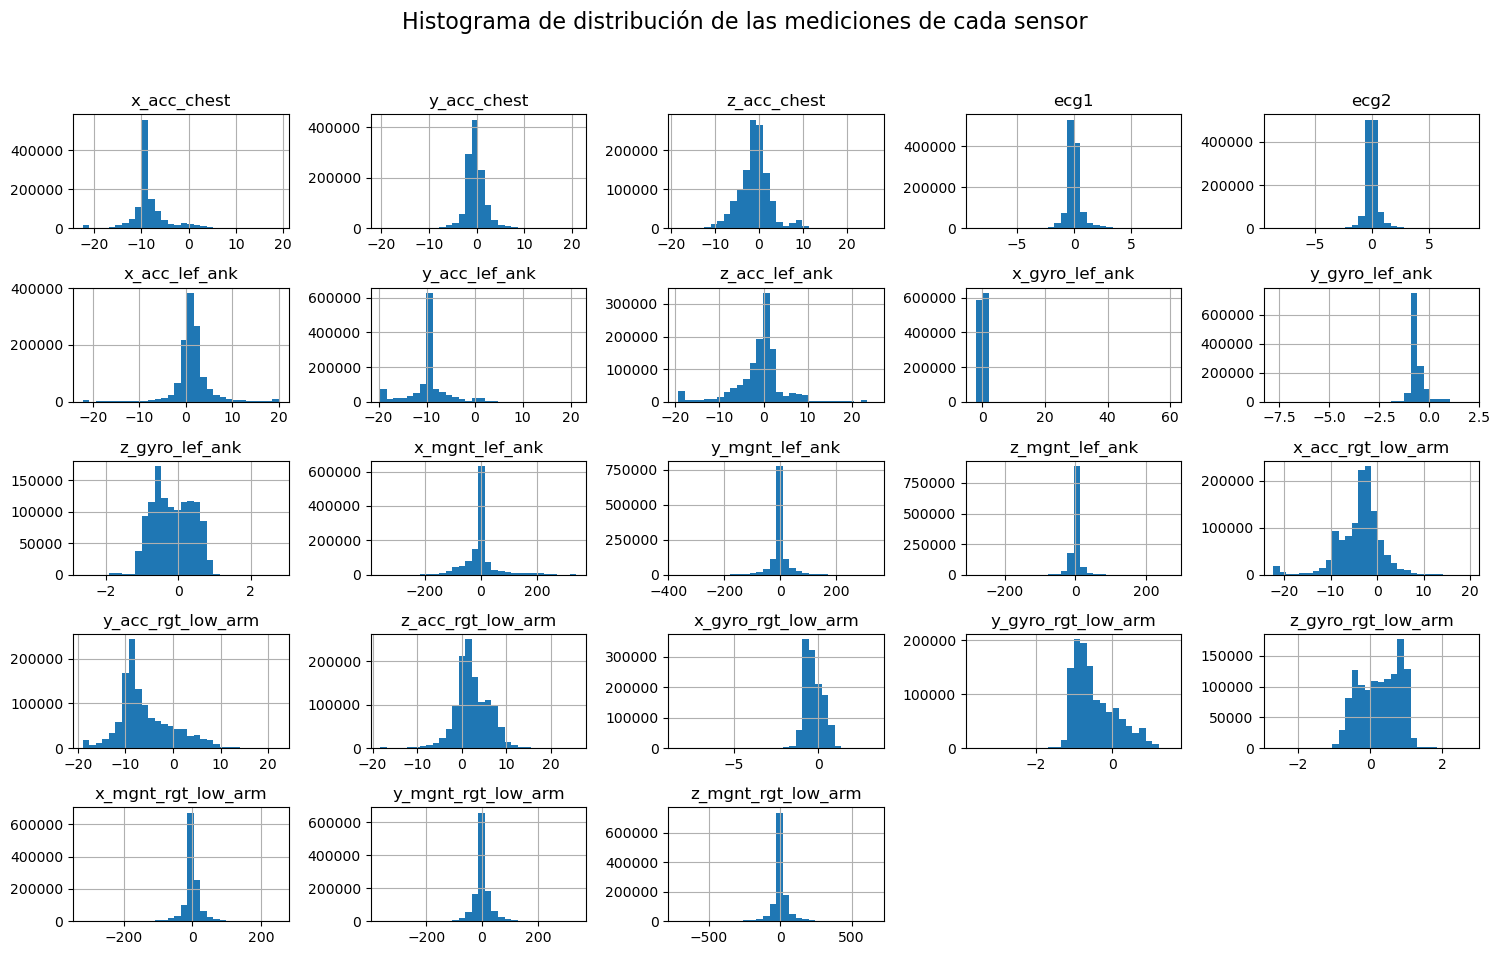

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionamos solo las columnas numéricas y excluimos 'null_class'
df_numeric = fusioned_df.select_dtypes(include=['number']).drop(columns=['null_class'], errors='ignore')

# Generar histogramas para cada atributo numérico
df_numeric.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograma de distribución de las mediciones de cada sensor", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Vemos que hay varios cuyas distribuciones no se asemejan a la normal, esto indica que podríamos necesitar aplicar estandarización (o era normalización? cuál era?)

Podemos confirmar cuáles son las que no se distribuyen como la normal utilizando la prueba Shapiro-wilk, cuya hipótesis nula es que se distribuye como normal, mientras que la alternativa es que se distribuye diferente a la normal. En esta pruba buscmaos un p-valor superior a 0.05 ya que nos indica que no hay suficiente evidencia para aformar que no es normal. 

## 1.9. Gráfica de densidad para los atributos

## 1.10. Gráfica de caja y bigotes para la distribución de los atributos. 

## 1.11. Matriz de correlación

CUÁL ES LA DIFERENCIA CON EL 7?????????????

## 1.12. Matriz de dispersión de los atributos

# 2. Segunda base de datos. PAMAP 2

## 2.1. Cargar datos

In [35]:
src = "datasets/2_PAMAP2/PAMAP2_Dataset/Protocol/"
keys = [
    "timestamp",
    "activityID",
    "heart_rate_bpm",
    # IMU Hand (columns 4–20)
    "IMU_Hand_temperature",
    "IMU_Hand_acceleration_16g_x",
    "IMU_Hand_acceleration_16g_y",
    "IMU_Hand_acceleration_16g_z",
    "IMU_Hand_acceleration_6g_x",
    "IMU_Hand_acceleration_6g_y",
    "IMU_Hand_acceleration_6g_z",
    "IMU_Hand_gyroscope_x",
    "IMU_Hand_gyroscope_y",
    "IMU_Hand_gyroscope_z",
    "IMU_Hand_magnetometer_x",
    "IMU_Hand_magnetometer_y",
    "IMU_Hand_magnetometer_z",
    "IMU_Hand_orientation_1",
    "IMU_Hand_orientation_2",
    "IMU_Hand_orientation_3",
    "IMU_Hand_orientation_4",
    # IMU Chest (columns 21–37)
    "IMU_Chest_temperature",
    "IMU_Chest_acceleration_16g_x",
    "IMU_Chest_acceleration_16g_y",
    "IMU_Chest_acceleration_16g_z",
    "IMU_Chest_acceleration_6g_x",
    "IMU_Chest_acceleration_6g_y",
    "IMU_Chest_acceleration_6g_z",
    "IMU_Chest_gyroscope_x",
    "IMU_Chest_gyroscope_y",
    "IMU_Chest_gyroscope_z",
    "IMU_Chest_magnetometer_x",
    "IMU_Chest_magnetometer_y",
    "IMU_Chest_magnetometer_z",
    "IMU_Chest_orientation_1",
    "IMU_Chest_orientation_2",
    "IMU_Chest_orientation_3",
    "IMU_Chest_orientation_4",
    # IMU Ankle (columns 38–54)
    "IMU_Ankle_temperature",
    "IMU_Ankle_acceleration_16g_x",
    "IMU_Ankle_acceleration_16g_y",
    "IMU_Ankle_acceleration_16g_z",
    "IMU_Ankle_acceleration_6g_x",
    "IMU_Ankle_acceleration_6g_y",
    "IMU_Ankle_acceleration_6g_z",
    "IMU_Ankle_gyroscope_x",
    "IMU_Ankle_gyroscope_y",
    "IMU_Ankle_gyroscope_z",
    "IMU_Ankle_magnetometer_x",
    "IMU_Ankle_magnetometer_y",
    "IMU_Ankle_magnetometer_z",
    "IMU_Ankle_orientation_1",
    "IMU_Ankle_orientation_2",
    "IMU_Ankle_orientation_3",
    "IMU_Ankle_orientation_4"
]

file_extension = '.dat'
delimiter = r'\s+'
data_loader_pamap = DataLoader(src, keys, file_extension, delimiter)
pamap_data = data_loader_pamap.load_data()

pamap_data.shape

subject101.dat
(376417, 54)
subject102.dat
(447000, 54)
subject103.dat
(252833, 54)
subject104.dat
(329576, 54)
subject105.dat
(374783, 54)
subject106.dat
(361817, 54)
subject107.dat
(313599, 54)
subject108.dat
(408031, 54)
subject109.dat
(8477, 54)


(2872533, 55)

## 2.2. Dimensiones y Primeras 5 filas

In [37]:
pamap_data.shape

(2872533, 55)

## 2.3. Identifica y elimina los datos ausentes

In [39]:
pamap_data.isnull().sum()

timestamp                             0
activityID                            0
heart_rate_bpm                  2610265
IMU_Hand_temperature              13141
IMU_Hand_acceleration_16g_x       13141
IMU_Hand_acceleration_16g_y       13141
IMU_Hand_acceleration_16g_z       13141
IMU_Hand_acceleration_6g_x        13141
IMU_Hand_acceleration_6g_y        13141
IMU_Hand_acceleration_6g_z        13141
IMU_Hand_gyroscope_x              13141
IMU_Hand_gyroscope_y              13141
IMU_Hand_gyroscope_z              13141
IMU_Hand_magnetometer_x           13141
IMU_Hand_magnetometer_y           13141
IMU_Hand_magnetometer_z           13141
IMU_Hand_orientation_1            13141
IMU_Hand_orientation_2            13141
IMU_Hand_orientation_3            13141
IMU_Hand_orientation_4            13141
IMU_Chest_temperature              3563
IMU_Chest_acceleration_16g_x       3563
IMU_Chest_acceleration_16g_y       3563
IMU_Chest_acceleration_16g_z       3563
IMU_Chest_acceleration_6g_x        3563


Aquí sí hay datos faltantes. HAY QUE ENCONTRAR LA MEJOR FORMA DE ARREGARLO. EN CUALQUIER CASO, ANTES DE MOVERLE, HAY QUE DIVIDIR EN TRAIN/TEST. Como son pocas muestras, hay que elegir el split que con la menor cantidad de muestras tenga la mayor variación para el de prueba, el resto debe ir a entrenamiento.

## 2.4. Tipos de datos de cada atributo

In [41]:
pamap_data.dtypes

timestamp                       float64
activityID                        int64
heart_rate_bpm                  float64
IMU_Hand_temperature            float64
IMU_Hand_acceleration_16g_x     float64
IMU_Hand_acceleration_16g_y     float64
IMU_Hand_acceleration_16g_z     float64
IMU_Hand_acceleration_6g_x      float64
IMU_Hand_acceleration_6g_y      float64
IMU_Hand_acceleration_6g_z      float64
IMU_Hand_gyroscope_x            float64
IMU_Hand_gyroscope_y            float64
IMU_Hand_gyroscope_z            float64
IMU_Hand_magnetometer_x         float64
IMU_Hand_magnetometer_y         float64
IMU_Hand_magnetometer_z         float64
IMU_Hand_orientation_1          float64
IMU_Hand_orientation_2          float64
IMU_Hand_orientation_3          float64
IMU_Hand_orientation_4          float64
IMU_Chest_temperature           float64
IMU_Chest_acceleration_16g_x    float64
IMU_Chest_acceleration_16g_y    float64
IMU_Chest_acceleration_16g_z    float64
IMU_Chest_acceleration_6g_x     float64


## 2.5. Resumen estadístico

In [43]:
pamap_data.describe()

,timestamp,activityID,heart_rate_bpm,IMU_Hand_temperature,IMU_Hand_acceleration_16g_x,IMU_Hand_acceleration_16g_y,IMU_Hand_acceleration_16g_z,IMU_Hand_acceleration_6g_x,IMU_Hand_acceleration_6g_y,IMU_Hand_acceleration_6g_z,...,IMU_Ankle_gyroscope_x,IMU_Ankle_gyroscope_y,IMU_Ankle_gyroscope_z,IMU_Ankle_magnetometer_x,IMU_Ankle_magnetometer_y,IMU_Ankle_magnetometer_z,IMU_Ankle_orientation_1,IMU_Ankle_orientation_2,IMU_Ankle_orientation_3,IMU_Ankle_orientation_4
count,2872533.000,2872533.000,262268.000,2859392.000,2859392.000,2859392.000,2859392.000,2859392.000,2859392.000,2859392.000,...,2860784.000,2860784.000,2860784.000,2860784.000,2860784.000,2860784.000,2860784.000,2860784.000,2860784.000,2860784.000
mean,1834.354,5.466,109.873,32.653,-4.961,3.588,3.168,-4.889,3.584,3.349,...,0.009,-0.035,0.008,-32.721,1.593,16.890,0.399,0.022,0.309,-0.019
std,1105.689,6.331,25.870,1.844,5.985,6.278,3.844,5.993,6.056,3.841,...,1.074,0.597,1.843,18.879,21.612,20.309,0.303,0.569,0.324,0.473
min,5.640,0.000,57.000,24.750,-145.367,-104.301,-101.452,-61.489,-61.868,-61.935,...,-23.995,-18.127,-14.020,-172.865,-137.908,-109.289,-0.254,-0.957,-0.877,-0.997
25%,893.160,0.000,90.000,31.438,-9.028,1.290,0.969,-8.933,1.285,1.164,...,-0.153,-0.083,-0.308,-42.895,-11.485,3.289,0.156,-0.584,0.011,-0.505
50%,1790.830,3.000,108.000,33.125,-5.788,3.571,2.958,-5.738,3.613,3.133,...,0.004,-0.004,-0.002,-33.900,1.363,18.091,0.320,0.000,0.304,0.000
75%,2710.570,7.000,125.000,34.000,-0.783,6.603,6.003,-0.725,6.602,6.258,...,0.095,0.083,0.063,-19.059,17.331,30.878,0.579,0.628,0.602,0.463
max,4475.630,24.000,202.000,35.500,62.860,155.699,157.760,52.821,62.260,61.945,...,17.420,13.588,16.529,97.525,123.306,146.900,1.000,0.960,0.992,0.996


## 2.6. Distribución de clases

In [45]:
class_distribution_pamap = pamap_data['activityID'].value_counts()
class_distribution_pamap

activityID
0     929661
4     238761
17    238690
1     192523
3     189931
7     188107
2     185188
16    175353
6     164600
12    117216
13    104944
5      98199
24     49360
Name: count, dtype: int64

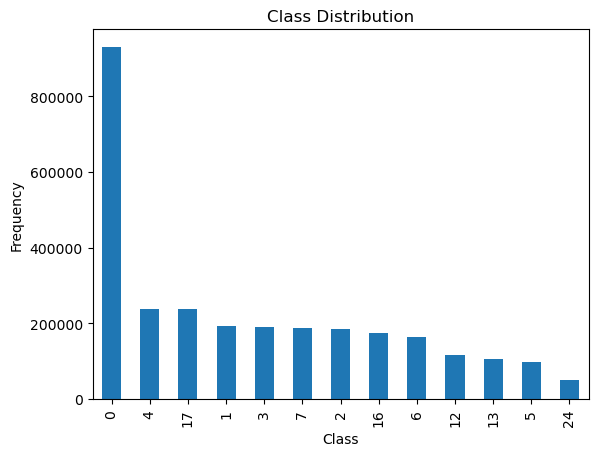

In [47]:
import matplotlib.pyplot as plt

class_distribution_pamap = pamap_data['activityID'].value_counts()
class_distribution_pamap.plot(kind='bar') 
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

Al igual que el anterior, hay imbalance de clases siendo la clase mayor la "0", que corresponde a "otros"

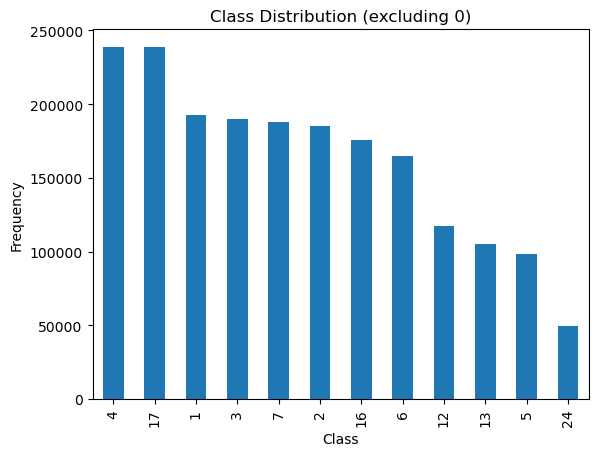

In [49]:
import matplotlib.pyplot as plt

# Filter out rows where 'activityID' is 0, then count the remaining classes
pamap_filtered_counts = pamap_data[pamap_data['activityID'] != 0]['activityID'].value_counts()

# Plot the resulting distribution
pamap_filtered_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution (excluding 0)')
plt.show()

Notamos un imbalance de clases en donde la clase menor es la clase 24. Tiene casi 4 veces menos que la clase 4. Por esto tenemos que usar métricas como Macro Average para ver la clasificación general y F1-score para la clasificación por nivel.

## 2.7. Correlación entre atributos

In [51]:
import pandas as pd

pamap_filtered = pamap_data.drop(columns=['activityID'], errors='ignore')
pamap_nmeric = pamap_filtered.select_dtypes(include=['number'])

pamap_corr_matrix = pamap_nmeric.corr(method='pearson')
pamap_corr_matrix

,timestamp,heart_rate_bpm,IMU_Hand_temperature,IMU_Hand_acceleration_16g_x,IMU_Hand_acceleration_16g_y,IMU_Hand_acceleration_16g_z,IMU_Hand_acceleration_6g_x,IMU_Hand_acceleration_6g_y,IMU_Hand_acceleration_6g_z,IMU_Hand_gyroscope_x,...,IMU_Ankle_gyroscope_x,IMU_Ankle_gyroscope_y,IMU_Ankle_gyroscope_z,IMU_Ankle_magnetometer_x,IMU_Ankle_magnetometer_y,IMU_Ankle_magnetometer_z,IMU_Ankle_orientation_1,IMU_Ankle_orientation_2,IMU_Ankle_orientation_3,IMU_Ankle_orientation_4
timestamp,1.000,0.732,-0.506,-0.171,0.008,-0.172,-0.180,0.005,-0.182,0.007,...,0.004,-0.030,-0.000,-0.227,-0.140,-0.071,0.171,0.059,0.064,0.163
heart_rate_bpm,0.732,1.000,-0.377,-0.195,0.028,-0.213,-0.203,0.025,-0.220,0.008,...,0.004,-0.016,0.005,-0.265,-0.169,-0.070,0.317,0.020,-0.019,0.133
IMU_Hand_temperature,-0.506,-0.377,1.000,0.009,-0.049,0.071,0.023,-0.045,0.088,-0.018,...,0.001,0.018,0.002,0.084,0.098,0.138,-0.092,0.052,-0.011,0.050
IMU_Hand_acceleration_16g_x,-0.171,-0.195,0.009,1.000,-0.018,0.210,0.983,-0.012,0.212,0.018,...,0.030,-0.053,0.081,0.046,0.164,-0.043,-0.012,0.045,-0.060,-0.075
IMU_Hand_acceleration_16g_y,0.008,0.028,-0.049,-0.018,1.000,-0.086,-0.006,0.953,-0.089,0.149,...,-0.003,-0.023,-0.030,-0.080,-0.099,0.035,0.094,-0.062,-0.099,-0.037
IMU_Hand_acceleration_16g_z,-0.172,-0.213,0.071,0.210,-0.086,1.000,0.209,-0.088,0.972,-0.023,...,0.013,-0.015,0.024,0.082,0.069,-0.042,-0.041,0.024,-0.042,-0.059
IMU_Hand_acceleration_6g_x,-0.180,-0.203,0.023,0.983,-0.006,0.209,1.000,-0.009,0.210,0.022,...,0.031,-0.051,0.072,0.047,0.168,-0.040,-0.014,0.047,-0.058,-0.075
IMU_Hand_acceleration_6g_y,0.005,0.025,-0.045,-0.012,0.953,-0.088,-0.009,1.000,-0.081,0.099,...,-0.001,-0.024,-0.012,-0.084,-0.102,0.037,0.098,-0.064,-0.103,-0.037
IMU_Hand_acceleration_6g_z,-0.182,-0.220,0.088,0.212,-0.089,0.972,0.210,-0.081,1.000,-0.013,...,0.013,-0.016,0.026,0.083,0.073,-0.040,-0.043,0.026,-0.041,-0.058
IMU_Hand_gyroscope_x,0.007,0.008,-0.018,0.018,0.149,-0.023,0.022,0.099,-0.013,1.000,...,0.017,-0.029,0.129,0.014,-0.055,-0.001,0.003,-0.027,-0.019,-0.009


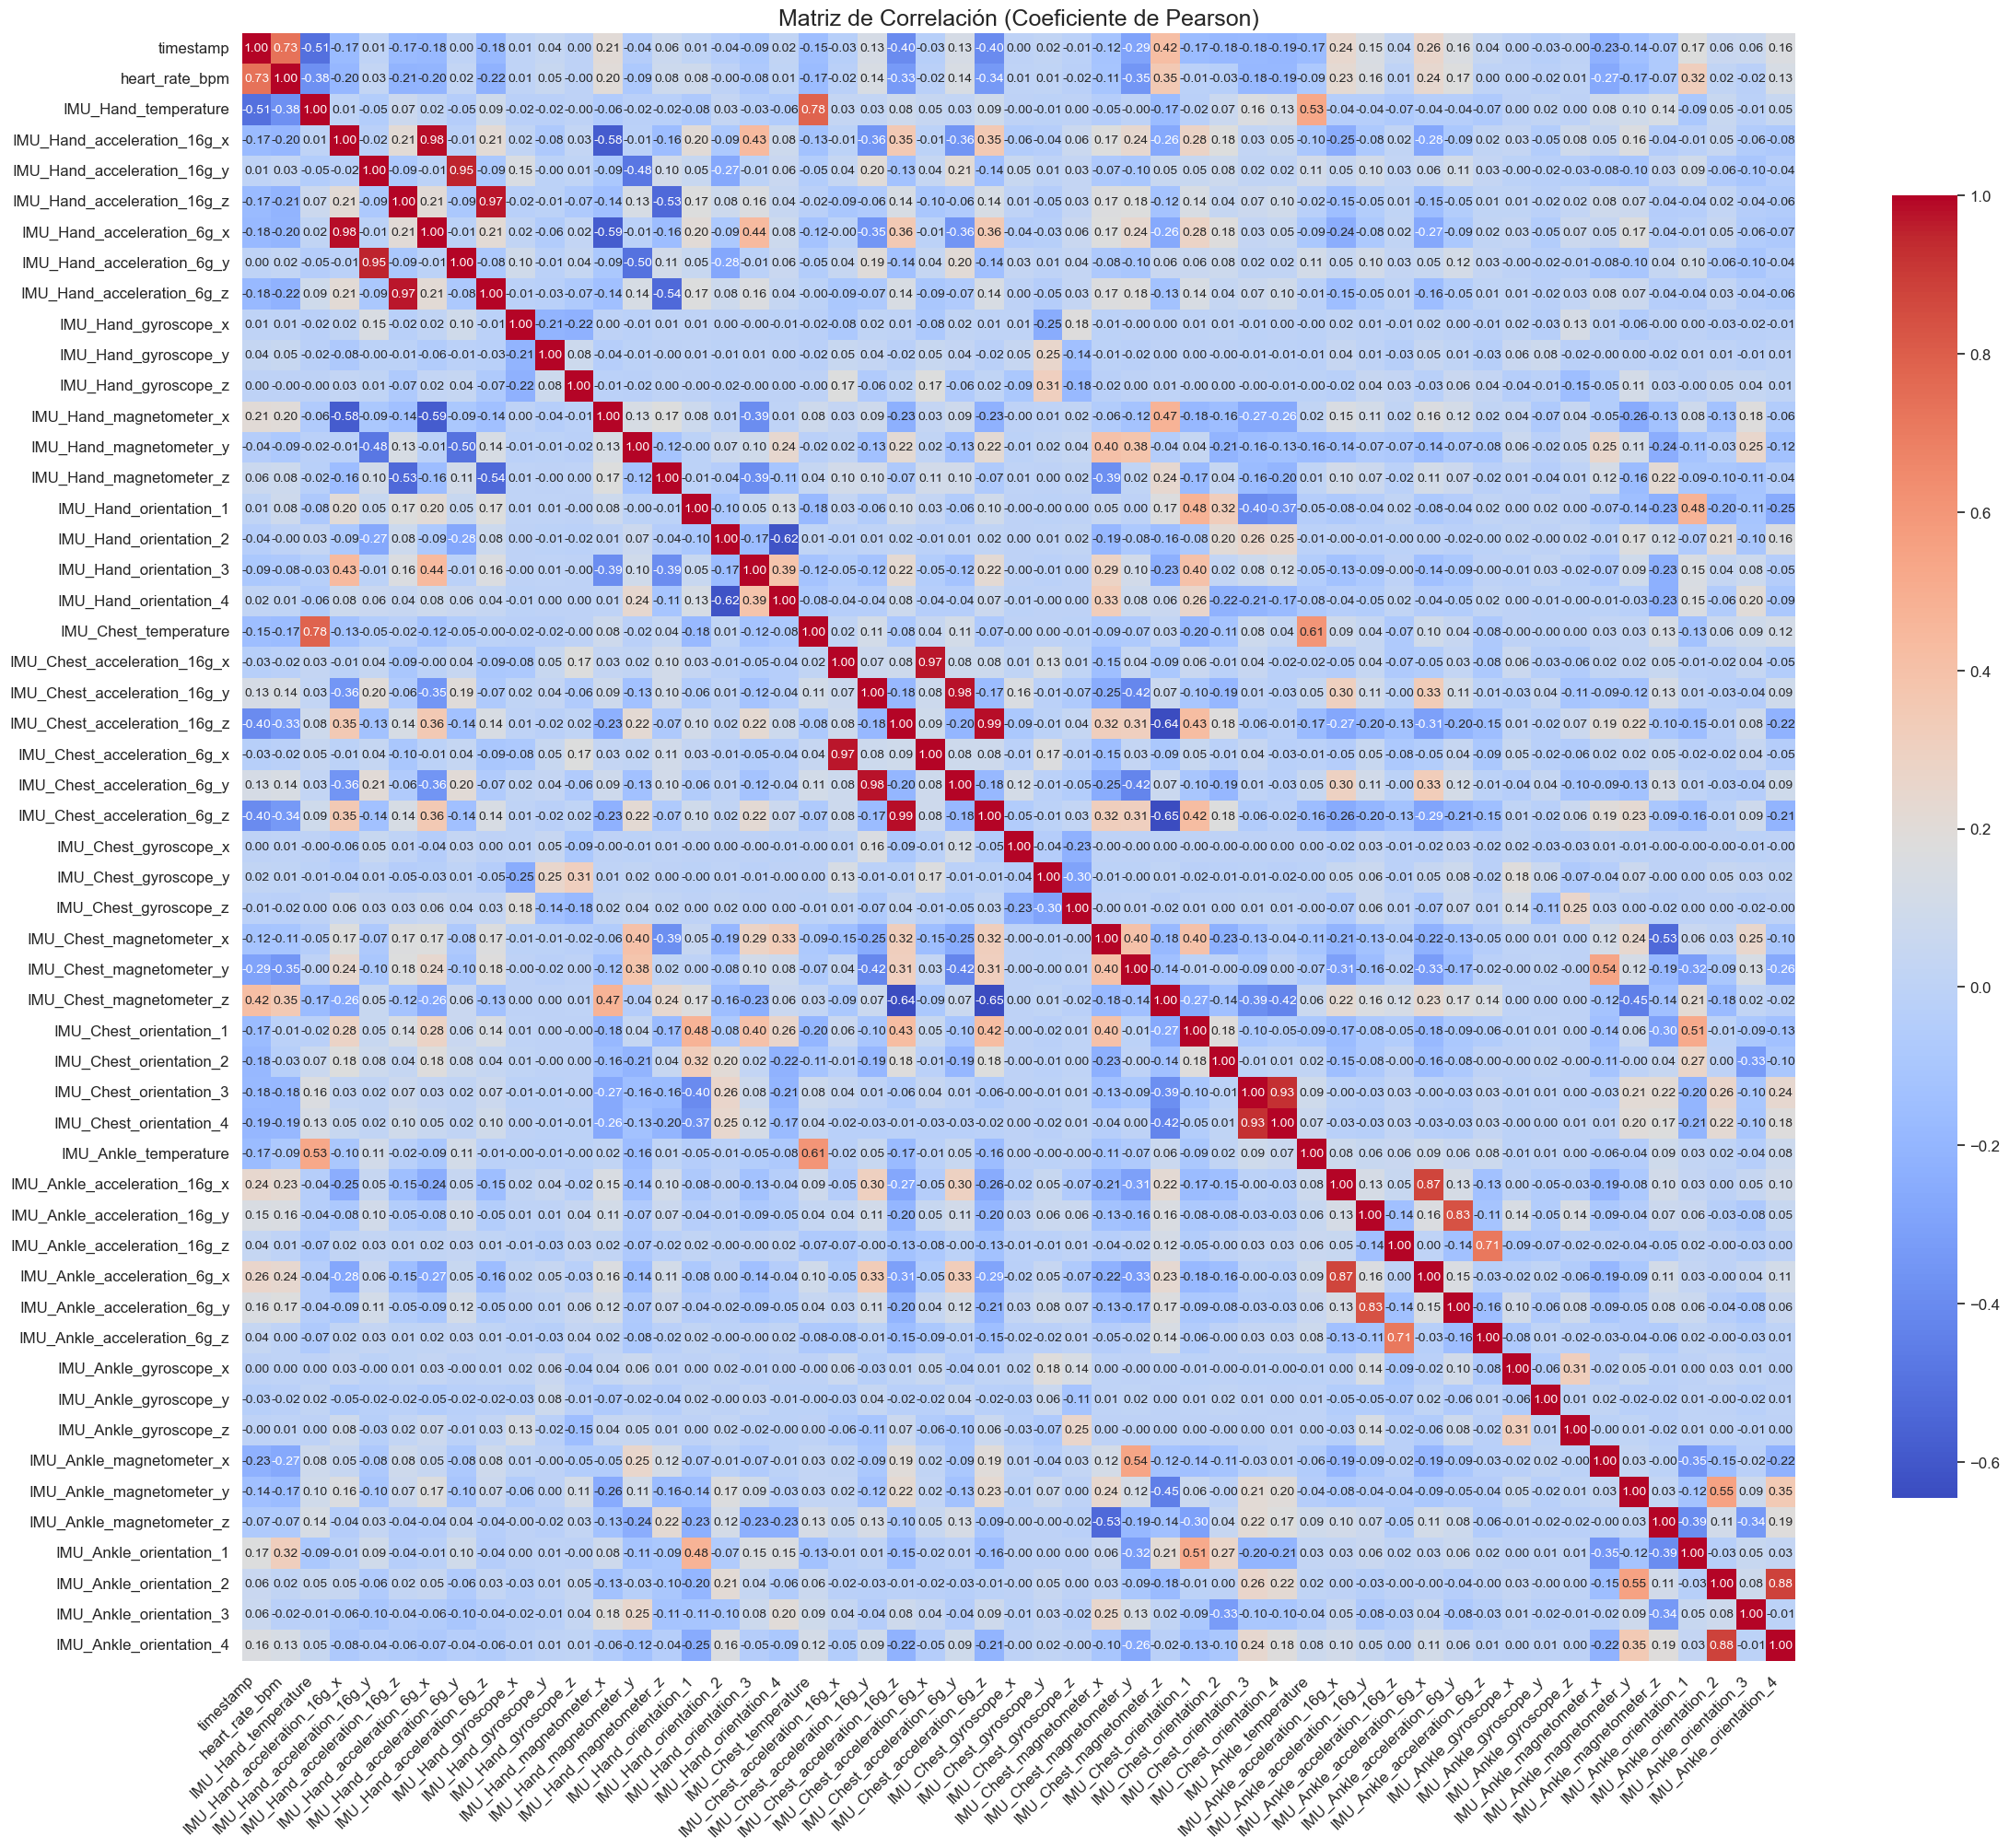

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.1)

plt.figure(figsize=(24, 20))

# Generar el heatmap
sns.heatmap(
    pamap_corr_matrix,
    annot=True,         # Mostrar valores numéricos
    fmt=".2f",          # Formato de 2 decimales
    cmap="coolwarm",
    annot_kws={"size": 10},  # Tamaño de fuente de los valores dentro de las celdas
    square=False,       
    cbar_kws={"shrink": 0.8} # Ajusta el tamaño de la barra de color
)

# Rotar etiquetas del eje X
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ajusta automáticamente los márgenes
plt.tight_layout()

plt.title('Matriz de Correlación (Coeficiente de Pearson)', fontsize=18)
plt.show()

## 2.8. Histograma de atributos

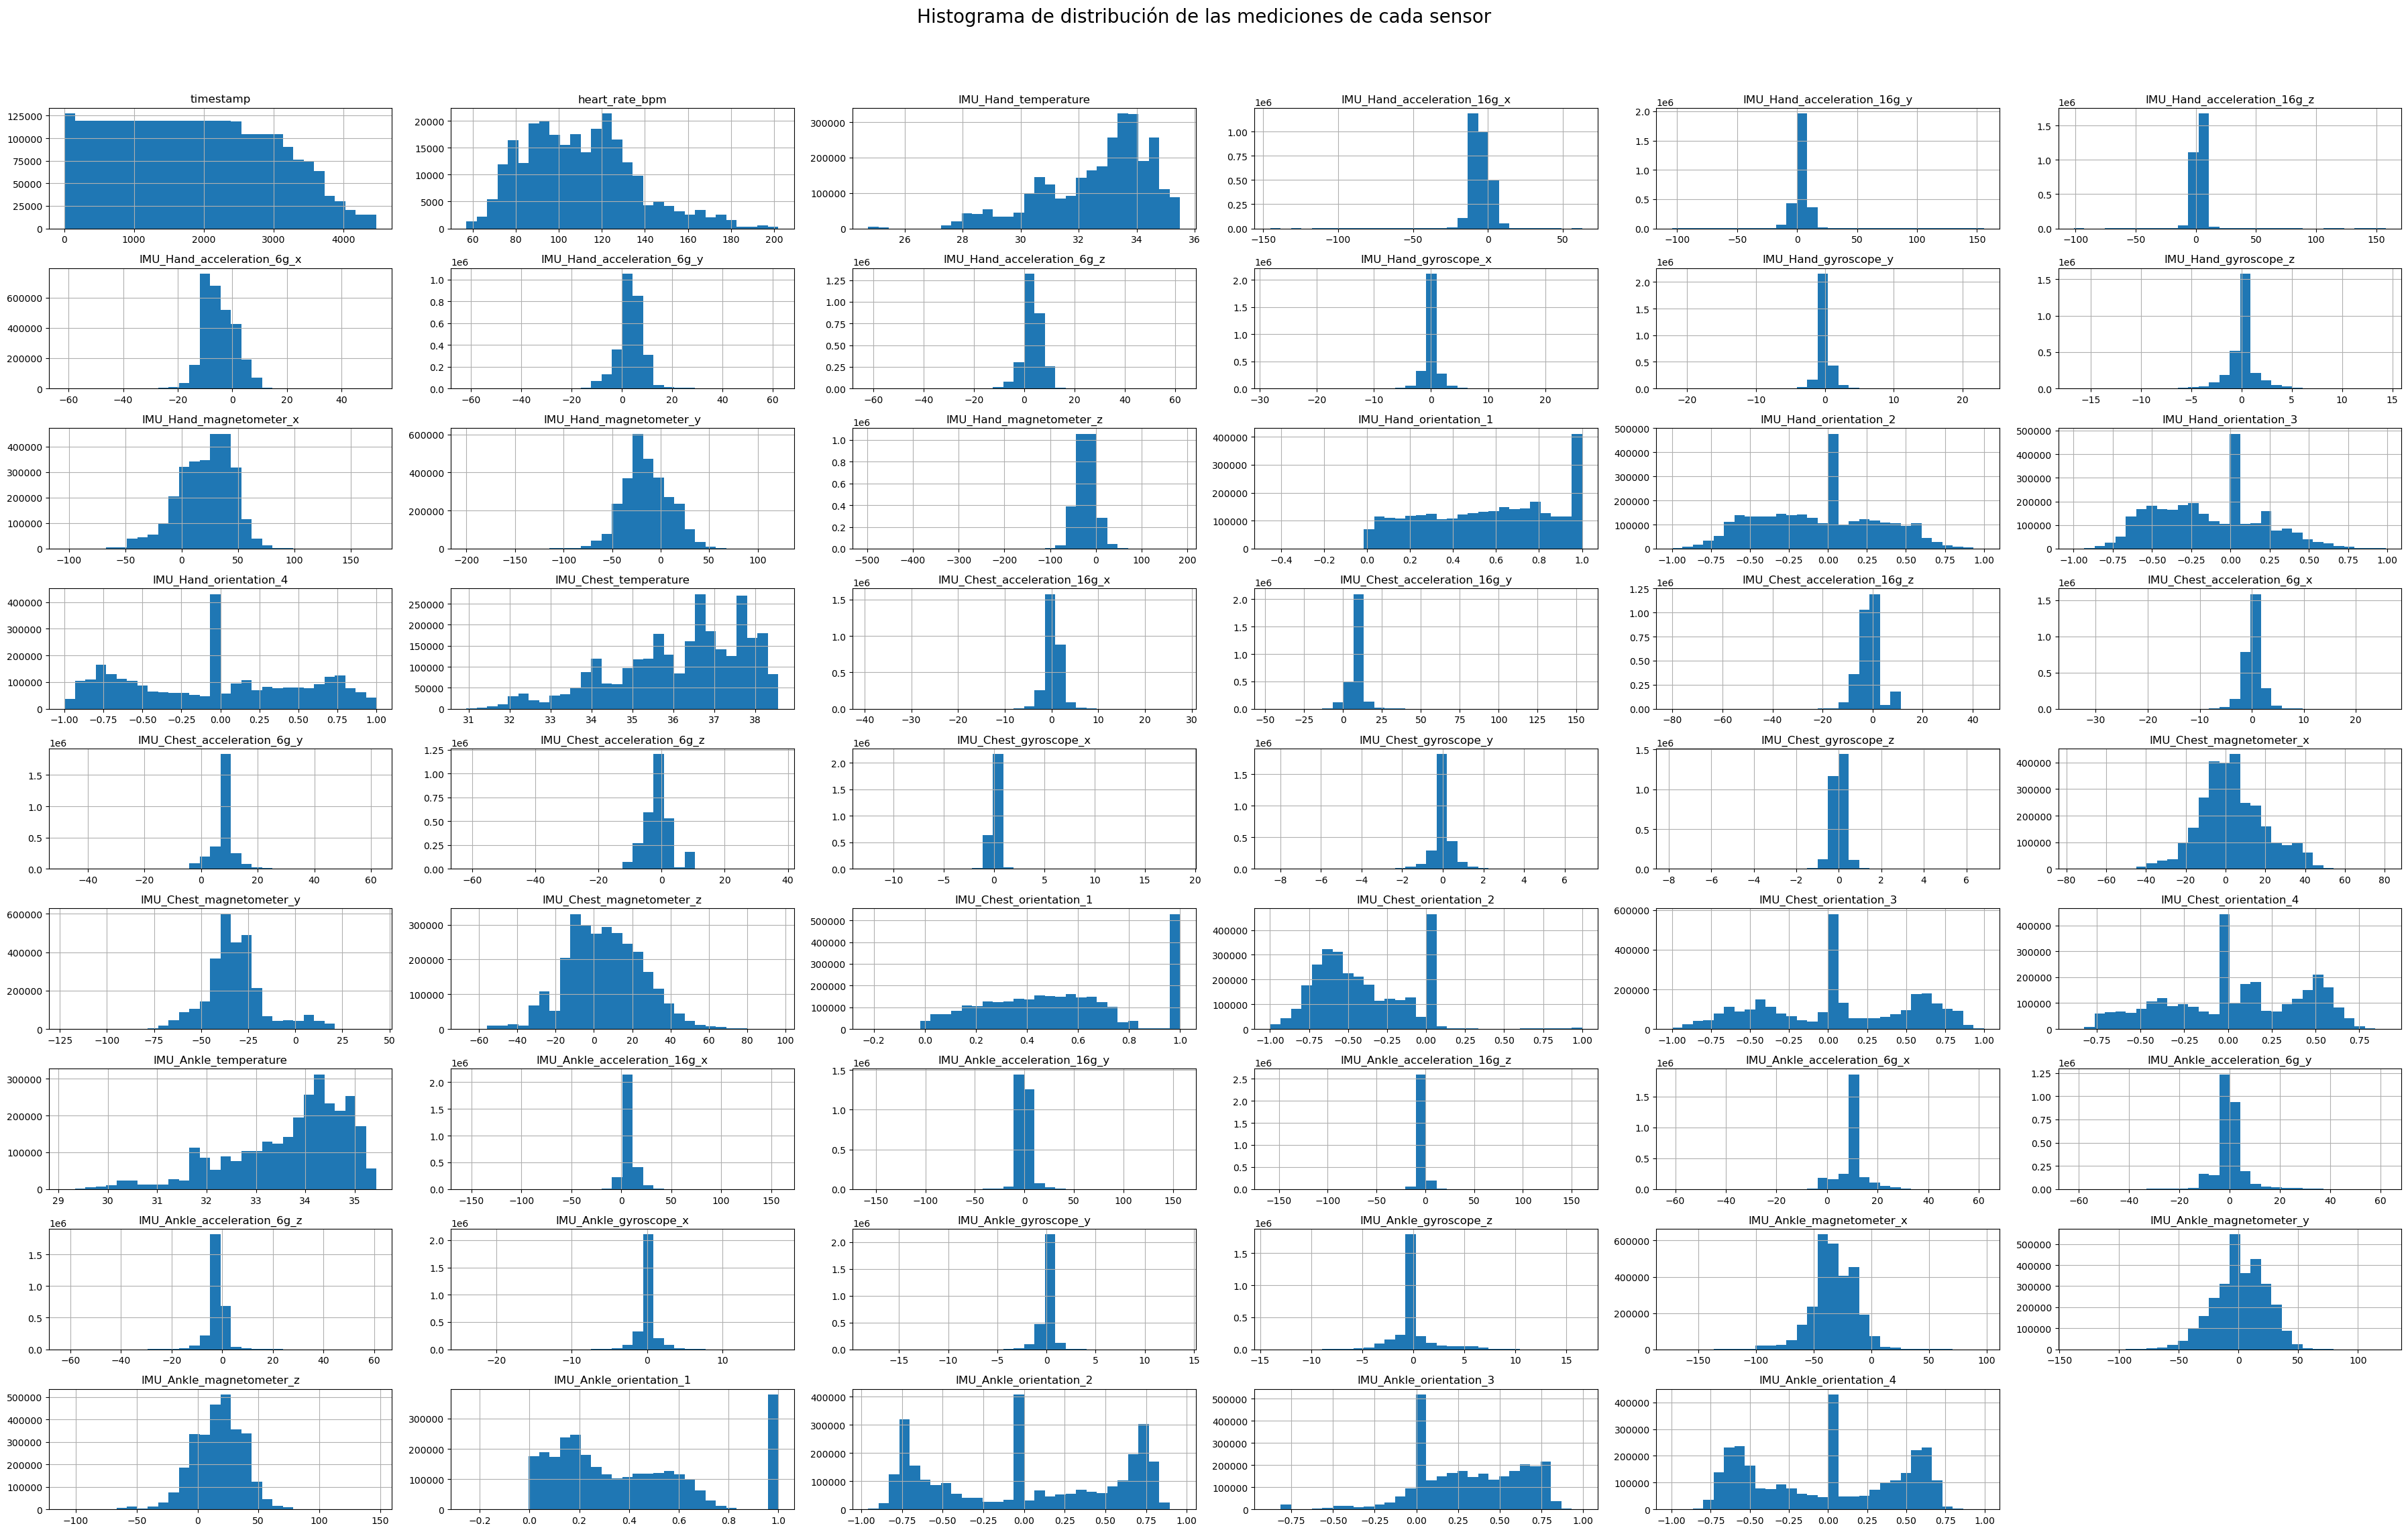

In [54]:
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas numéricas y excluimos 'activityID'
pamap_numeric = pamap_data.select_dtypes(include=['number']).drop(columns=['activityID'], errors='ignore')

rows = 9
cols = 6

# Generar histogramas con un tamaño de figura grande y sin compartir ejes
pamap_numeric.hist(
    bins=30,
    figsize=(36, 24),   
    layout=(rows, cols),
    sharex=False,
    sharey=False
)

plt.suptitle("Histograma de distribución de las mediciones de cada sensor", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # deja espacio para el título en la parte superior
plt.show()


# 3. Tercera base de datos. 

## 3.1. Cargar datos